Building a library of python functions for time series analysis.

In [1]:
# Importing libraries
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
# Getting bitcoin data from coindesk api
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'


start = datetime.date(2017, 1 ,1)
end = datetime.date(2020, 7, 20)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [3]:
# Creating a pandas dataframe from the json data
data = pd.read_json(result.content).iloc[:-2,:1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)
data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2020-07-15,9214.1275
2020-07-16,9116.3250
2020-07-17,9122.2200


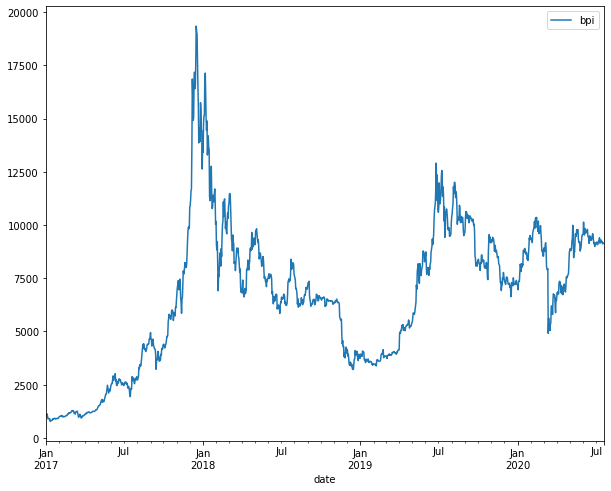

In [4]:
# Visualizing the data
data.plot()

#### Resample

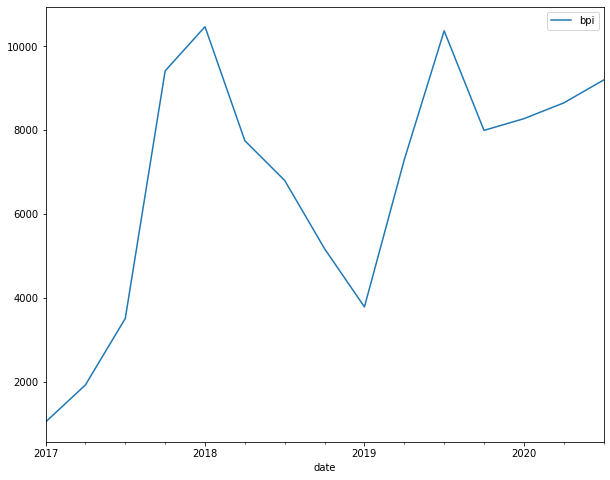

In [5]:
# Resampling quarterly
data.resample('Q').mean().plot()

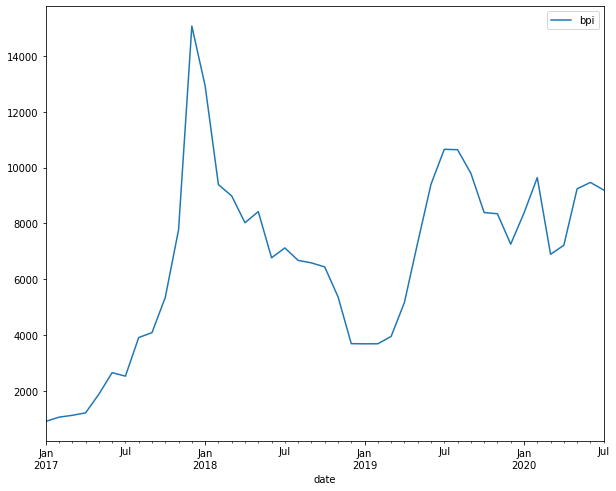

In [6]:
# Resampling monthly
data.resample('M').mean().plot()

#### De-trend using diff()

In [7]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [8]:
data[:5].diff()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [9]:
data[:5].diff(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


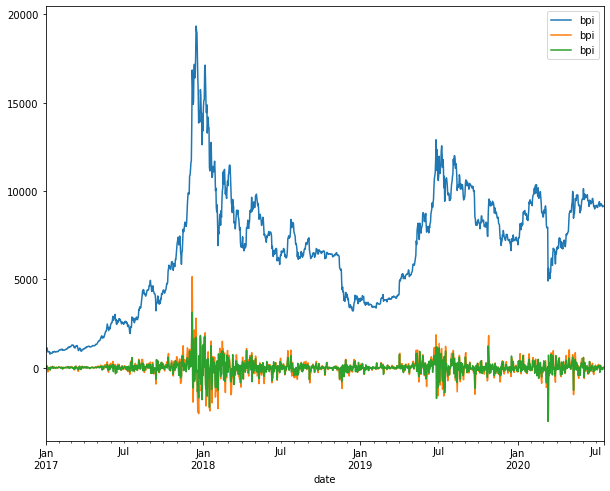

In [10]:
pd.concat([data['bpi'],data['bpi'].diff(2),data['bpi'].diff()],axis=1).plot()

Now, the data looks stationary and readu for ARIMA.

#### shift()

In [11]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [12]:
data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


In [13]:
data[:5].tshift(2)

,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150


In [14]:
data[:5] - data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


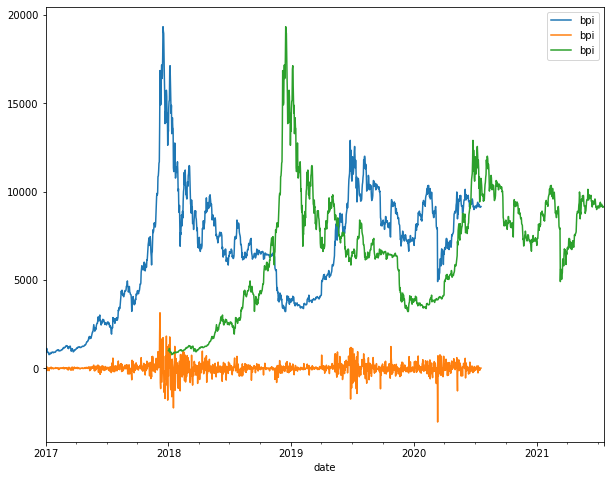

In [15]:
pd.concat([data, data-data.shift(), data.tshift(365)],axis=1).plot()

#### Rolling Window

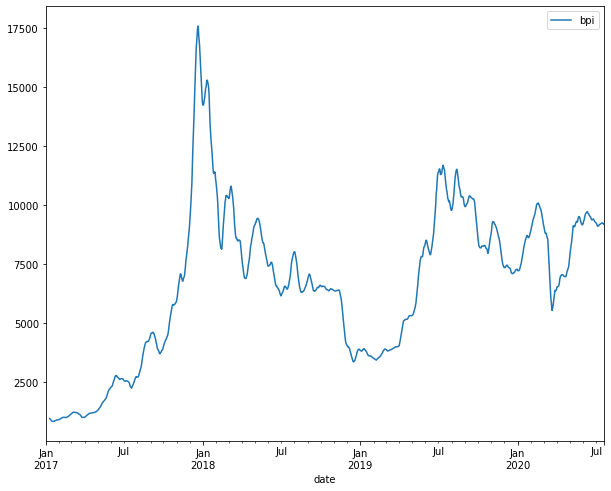

In [16]:
# Rolling average for past 10 days
data.rolling(window=10).mean().plot()

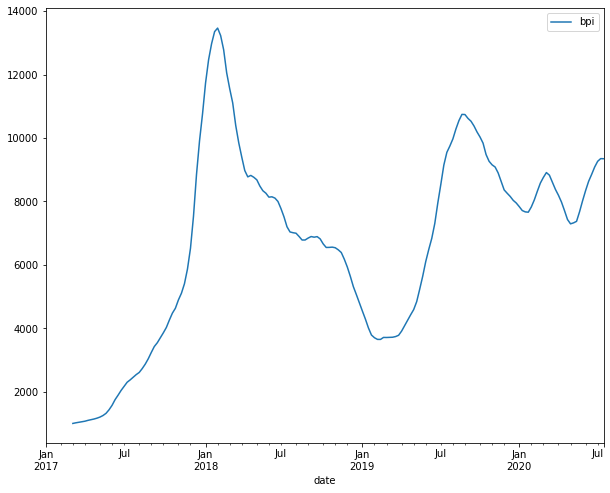

In [17]:
# Resampling weekly and rolling mean of window 10
data.resample('W').mean().rolling(window=10).mean().plot()

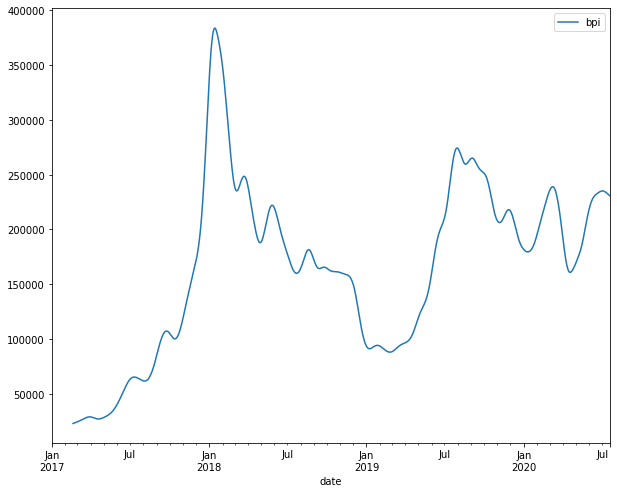

In [18]:
# Weighted moving average
data.rolling(window=50,win_type='gaussian').sum(std=10).plot()

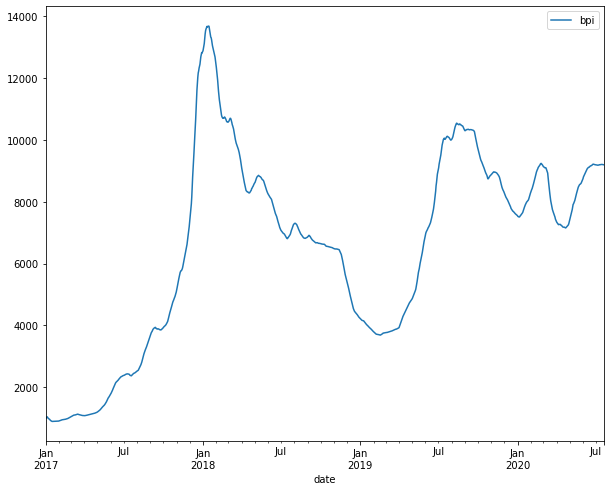

In [19]:
# Exponential Moving Average
data.ewm(span=50).mean().plot()

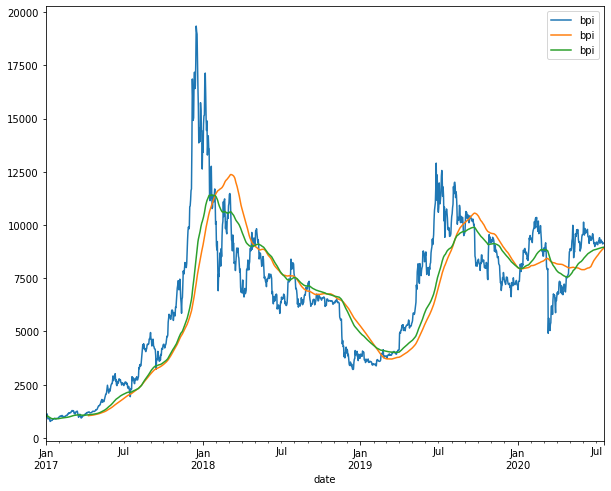

In [20]:
# Combining all
pd.concat([data, data.rolling(window=100).mean(), data.ewm(span=100).mean()],axis=1).plot()

#### Groupby

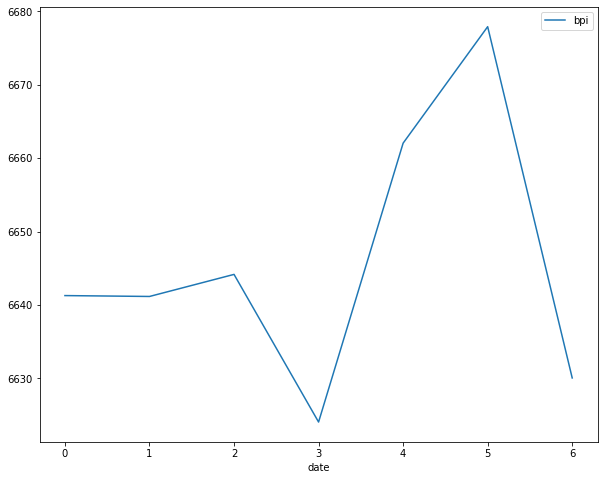

In [21]:
# Average price by day
data.groupby(data.index.dayofweek).mean().plot()

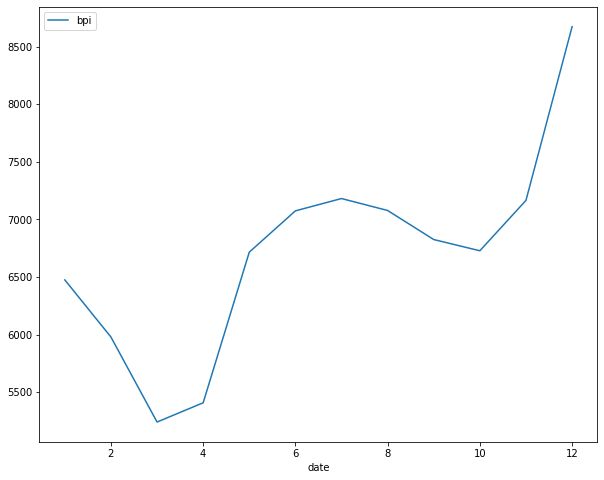

In [22]:
# Average price by month
data.groupby(data.index.month).mean().plot()

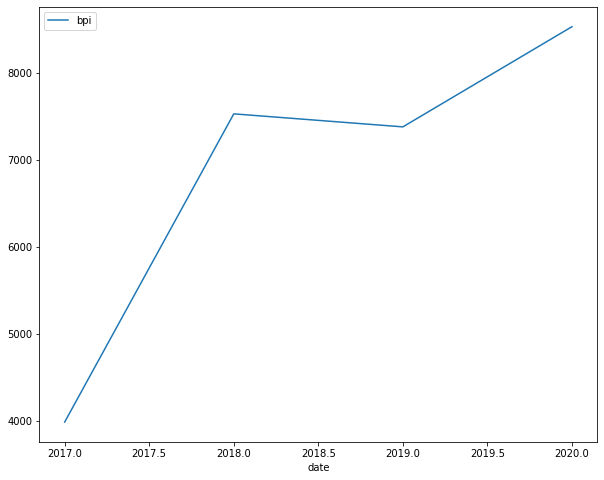

In [23]:
# Average price by year
data.groupby(data.index.year).mean().plot()

In [24]:
# Cummulative sum
data[:5].cumsum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [25]:
# Percentage change with t-2
data[:5].pct_change(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,0.033205
2017-01-04,0.109837
2017-01-05,-0.024255


In [26]:
# Expanding sum
data[:5].expanding().sum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [27]:
# Expanding sum
data[:5].expanding().mean()

,bpi
date,
2017-01-01,997.688800
2017-01-02,1007.869400
2017-01-03,1015.518767
2017-01-04,1044.106575
2017-01-05,1036.448260
